<a href="https://colab.research.google.com/github/iceman025/assignment-03/blob/main/assignment_3_Resampling_Methods0809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load pachages
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(readxl)
install.packages("ISLR")
library (ISLR)
library(tidyverse)
install.packages("datarium")
install.packages("ISLR2")
library(ISLR2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ISLR2’


The following objects are masked from ‘package:ISLR’:

    Auto, Credit




1. analysis of diamond data set





In [2]:
# data import and cleaning of diamond
df_diamond <- read.csv("https://raw.githubusercontent.com/iceman025/professordiamonds/main/MBA6636_SM21_Professor_Proposes_Data.csv")
summary(df_diamond)
str(df_diamond)

     Carat           Colour            Clarity              Cut           
 Min.   :0.0900   Length:441         Length:441         Length:441        
 1st Qu.:0.3000   Class :character   Class :character   Class :character  
 Median :0.8100   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.6693                                                           
 3rd Qu.:1.0100                                                           
 Max.   :1.5800                                                           
 NA's   :1                                                                
 Certification         Polish            Symmetry            Price          
 Length:441         Length:441         Length:441         Length:441        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

'data.frame':	441 obs. of  9 variables:
 $ Carat        : num  0.92 0.92 0.82 0.81 0.9 0.87 0.8 0.84 0.8 0.8 ...
 $ Colour       : chr  "I" "I" "F" "G" ...
 $ Clarity      : chr  "SI2" "SI2" "SI2" "SI1" ...
 $ Cut          : chr  "G" "V" "I" "I" ...
 $ Certification: chr  "AGS" "AGS" "GIA" "GIA" ...
 $ Polish       : chr  "V" "G" "X" "X" ...
 $ Symmetry     : chr  "V" "G" "X" "V" ...
 $ Price        : chr  "$3,000" "$3,000" "$3,004" "$3,004" ...
 $ Wholesaler   : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
# data split of diamond
rows <- sample(nrow(df_diamond))
diamonds <- df_diamond[rows, ]
split <- round(nrow(df_diamond) * .80)
train <- df_diamond[1:split, ]
test <- df_diamond[(split + 1):nrow(df_diamond), ]


In [4]:
# change the catagorical variables to numerical variables
library(dplyr)
x <- factor(c("Carat","Cut","Colour","Clarity"))
x_new <- unclass(x)
df_diamond$Cut <- unclass(df_diamond$Cut)
df_diamond$Price <- unclass(df_diamond$Price)
df_diamond$Colour <- unclass(df_diamond$Colour)
df_diamond$Clarity <- unclass(df_diamond$Clarity)
df_diamond[sapply(df_diamond, is.factor)] <- data.matrix(df_diamond[sapply(df_diamond, is.factor)])

MakeNum <- function(df_diamond) as.numeric(as.factor(df_diamond))
df_diamond <- mutate_at(df_diamond, 2:8, MakeNum)
str(df_diamond)

'data.frame':	441 obs. of  9 variables:
 $ Carat        : num  0.92 0.92 0.82 0.81 0.9 0.87 0.8 0.84 0.8 0.8 ...
 $ Colour       : num  7 7 4 5 8 4 2 4 2 2 ...
 $ Clarity      : num  5 5 5 4 8 5 5 4 5 5 ...
 $ Cut          : num  3 5 4 4 5 4 4 3 5 5 ...
 $ Certification: num  2 2 5 5 5 2 5 5 5 5 ...
 $ Polish       : num  6 3 7 7 6 3 6 6 6 6 ...
 $ Symmetry     : num  5 3 6 5 5 5 5 5 5 6 ...
 $ Price        : num  106 106 107 107 108 109 110 111 112 112 ...
 $ Wholesaler   : int  1 1 1 1 1 1 1 1 1 1 ...


In [5]:
# The Validation Set Approach of diamond
set.seed (1)
train <- sample (440 , 220)
# calculate the MSE of the observations in the validation set of diamond
lm.fit <- lm(log(Price) ~log(Carat) + Cut + Colour + Clarity, 
     data=df_diamond)
model_summ <-summary(lm.fit)
mean(model_summ$residuals^2)

[1] 0.7313215

In [6]:
# Leave-One-Out Cross-Validation
 library (boot)

lm.fit <- lm(log(Price) ~log(Carat) + Cut + Colour + Clarity, 
     data=df_diamond)
coef(lm.fit)

(Intercept)   log(Carat)          Cut       Colour      Clarity 
3.6113686908 0.0896585767 0.1339698244 0.0002102698 0.1034569128

In [7]:
# create function that computes LOOCV MSE based on specified polynomial degree???
loocv_error <- function(x) {
  glm.fit <- glm(log(price) ~log(carat) + cut + color + clarity, 
     data=df_diamond)
  cv.glm(df_diamond, glm.fit)$delta[1]
}

In [8]:
# create function that computes LOOCV MSE based on specified polynomial degree
loocv_error <- function(x) {
  glm.fit <- lm(log(Price) ~log(Carat) + Cut + Colour + Clarity, 
     data=df_diamond)
  cv.glm(df_diamond, glm.fit)$delta[1]
}

# compute LOOCV MSE for polynomial degrees 1-5
library(purrr)
1:5 %>% map_dbl(loocv_error)

[1] NaN NaN NaN NaN NaN

In [9]:
# k-Fold Cross Validation of diamonds
library (boot)

system.time({
  diamonds.fit <- lm(log(Price) ~ log(Carat) + Cut + Colour + Clarity, data = df_diamond)
  cv.glm(df_diamond, diamonds.fit, K = 10)
})

   user  system elapsed 
  0.028   0.000   0.028 

In [10]:
#Bootstrap on Regression: step 1
statistic <- function(df_diamond, index) {
  x <- df_diamond$X[index]
  y <- df_diamond$Y[index]
  (var(y) - cov(x, y)) / (var(x) + var(y) - 2* cov(x, y))
}

In [11]:
#Bootstrap on Regression:step 2
install.packages("ISLR")
library (ISLR)
library(tidyverse)  # data manipulation and visualization
library(boot)
portfolio <- ISLR::Portfolio

# compute our statistic for all 100 observations
statistic(portfolio, 1:100)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.5758321

In [12]:
#Bootstrap on Regression: step 3
statistic(portfolio, sample(100, 100, replace = TRUE))

[1] 0.7041892

In [13]:
# #Bootstrap on Regression :step 4
library(boot)
set.seed(123)
boot(portfolio, statistic, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = portfolio, statistic = statistic, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.007544609  0.08952496

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.3918,  0.7449 )  
Calculations and Intervals on Original Scale

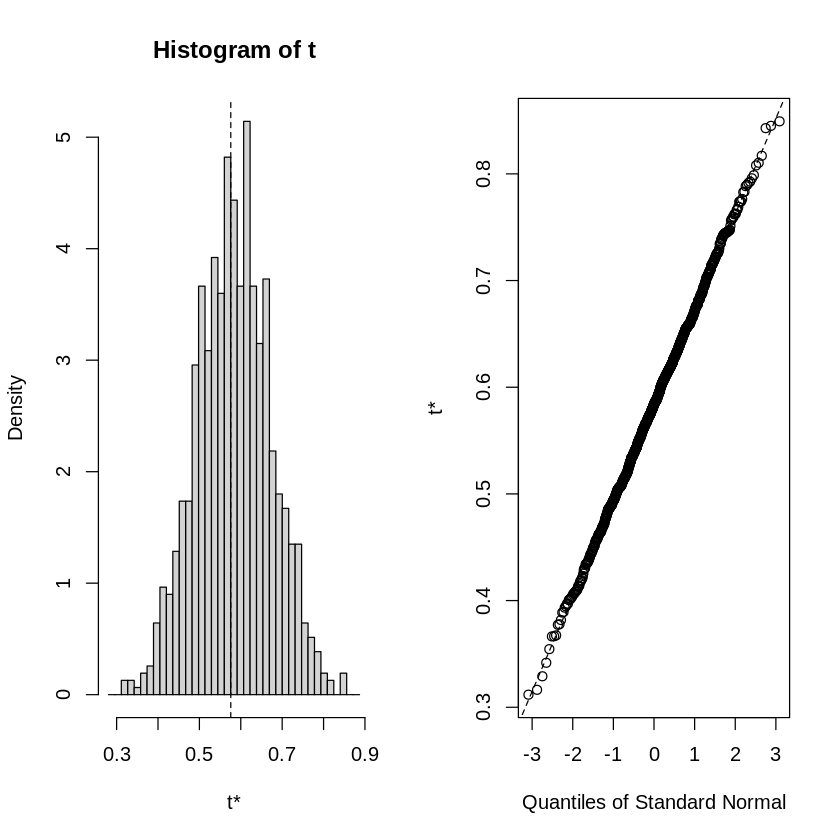

In [14]:
#Bootstrap on Regression:step 5-
#generate the bootstrap estimates we can also view the confidence intervals with boot.ci and plot our results
set.seed(123)
result <- boot(portfolio, statistic, R = 1000)
boot.ci(result, type = "basic")
plot(result)

2. analysis of bank data set


In [15]:
#  bank data import
df_bank<-read_delim("https://raw.githubusercontent.com/iceman025/bank-assignment-02/main/bank-additional-full.csv",delim = ";")
str(df_bank)
head(df_bank)
sum(is.na(df_bank))
glimpse(df_bank)

Rows: 41188 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (11): job, marital, education, default, housing, loan, contact, month, d...
dbl (10): age, duration, campaign, pdays, previous, emp.var.rate, cons.price...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spec_tbl_df [41,188 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age           : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ marital       : chr [1:41188] "married" "married" "married" "married" ...
 $ education     : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr [1:41188] "no" "unknown" "no" "no" ...
 $ housing       : chr [1:41188] "no" "no" "yes" "no" ...
 $ loan          : chr [1:41188] "no" "no" "no" "no" ...
 $ contact       : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr [1:41188] "may" "may" "may" "may" ...
 $ day_of_week   : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ duration      : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : num [1:41188] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num [1:41188] 999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num [1:411

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


[1] 0

Rows: 41,188
Columns: 21
$ age            <dbl> 56, 57, 37, 40, 56, 45, 59, 41, 24, 25, 41, 25, 29, 57,…
$ job            <chr> "housemaid", "services", "services", "admin.", "service…
$ marital        <chr> "married", "married", "married", "married", "married", …
$ education      <chr> "basic.4y", "high.school", "high.school", "basic.6y", "…
$ default        <chr> "no", "unknown", "no", "no", "no", "unknown", "no", "un…
$ housing        <chr> "no", "no", "yes", "no", "no", "no", "no", "no", "yes",…
$ loan           <chr> "no", "no", "no", "no", "yes", "no", "no", "no", "no", …
$ contact        <chr> "telephone", "telephone", "telephone", "telephone", "te…
$ month          <chr> "may", "may", "may", "may", "may", "may", "may", "may",…
$ day_of_week    <chr> "mon", "mon", "mon", "mon", "mon", "mon", "mon", "mon",…
$ duration       <dbl> 261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 22…
$ campaign       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ pdays        

In [16]:
# model building 
model_full <- glm(formula =as.factor(y)~duration + month + poutcome + emp.var.rate + job + cons.price.idx + 
    contact + euribor3m + day_of_week + campaign + pdays + education + 
    cons.conf.idx + default , 
 family = "binomial", data = df_bank)
     summary(model_full)


Call:
glm(formula = as.factor(y) ~ duration + month + poutcome + emp.var.rate + 
    job + cons.price.idx + contact + euribor3m + day_of_week + 
    campaign + pdays + education + cons.conf.idx + default, family = "binomial", 
    data = df_bank)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0080  -0.2976  -0.1855  -0.1346   3.3263  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.713e+02  1.032e+01 -16.597  < 2e-16 ***
duration                      4.707e-03  7.457e-05  63.125  < 2e-16 ***
monthaug                      7.622e-01  1.075e-01   7.092 1.32e-12 ***
monthdec                      1.809e-01  1.958e-01   0.924 0.355648    
monthjul                      1.341e-01  9.579e-02   1.400 0.161423    
monthjun                     -4.037e-01  1.064e-01  -3.793 0.000149 ***
monthmar                      1.870e+00  1.169e-01  15.994  < 2e-16 ***
monthmay                     -5.017e-01  7.610e

In [17]:
# Leave-One-Out Cross-Validation
 library (boot)
data(df_bank)

lm.fit2 <- glm(formula =as.factor(y)~duration + month + poutcome + emp.var.rate + job + cons.price.idx + 
    contact + euribor3m + day_of_week + campaign + pdays + education + 
    cons.conf.idx + default , 
 family = "binomial", data = df_bank)
coef(lm.fit2)

Warning message in data(df_bank):
“data set ‘df_bank’ not found”


(Intercept)                     duration 
               -1.713299e+02                 4.707335e-03 
                    monthaug                     monthdec 
                7.621668e-01                 1.808653e-01 
                    monthjul                     monthjun 
                1.341370e-01                -4.036632e-01 
                    monthmar                     monthmay 
                1.870181e+00                -5.017057e-01 
                    monthnov                     monthoct 
               -5.214135e-01                 3.543449e-02 
                    monthsep          poutcomenonexistent 
                1.532390e-01                 4.966073e-01 
             poutcomesuccess                 emp.var.rate 
                1.021730e+00                -1.606873e+00 
              jobblue-collar              jobentrepreneur 
               -2.353362e-01                -1.822498e-01 
                jobhousemaid                jobmanagement 
               -2.965722e-02                -6.864573e-02 
                  jobretired             jobself-employed 
                2.783738e-01                -1.607440e-01 
                 jobservices                   jobstudent 
               -1.428383e-01                 2.311813e-01 
               jobtechnician                jobunemployed 
               -1.590896e-02                 1.736894e-02 
                  jobunknown               cons.price.idx 
               -7.189527e-02                 1.779699e+00 
            contacttelephone                    euribor3m 
               -6.067452e-01                 5.011796e-01 
              day_of_weekmon               day_of_weekthu 
               -1.208210e-01                 5.634705e-02 
              day_of_weektue               day_of_weekwed 
                8.948309e-02                 1.690153e-01 
                    campaign                        pdays 
               -4.026451e-02                -8.541765e-04 
           educationbasic.6y            educationbasic.9y 
                1.219842e-01                 3.528640e-03 
        educationhigh.school          educationilliterate 
                5.681897e-02                 1.069923e+00 
educationprofessional.course   educationuniversity.degree 
                1.175341e-01                 2.034363e-01 
            educationunknown                cons.conf.idx 
                1.565260e-01                 1.108333e-02 
              defaultunknown                   defaultyes 
               -3.017932e-01                -7.317008e+00

In [18]:
# k-Fold Cross Validation of bank
library (boot)
data(df_bank)
system.time({
  bank.fit <- glm(formula =as.factor(y)~duration + month + poutcome + emp.var.rate + job + cons.price.idx + 
    contact + euribor3m + day_of_week + campaign + pdays + education + 
    cons.conf.idx + default , 
 family = "binomial", data = df_bank)
  cv.glm(df_bank, bank.fit, K = 10)
})

Warning message in data(df_bank):
“data set ‘df_bank’ not found”


   user  system elapsed 
  9.127   0.149   9.288 

In [19]:
#Bootstrap on Regression: step 1
statistic2 <- function(df_bank, index) {
  x <- df_bank$X[index]
  y <- df_bank$Y[index]
  (var(y) - cov(x, y)) / (var(x) + var(y) - 2* cov(x, y))
}
#Bootstrap on Regression:step 2
install.packages("ISLR")
library (ISLR)
library(boot)
portfolio2 <- ISLR::Portfolio
# compute our statistic for all 100 observations
statistic(portfolio2, 1:100)
#Bootstrap on Regression: step 3
statistic(portfolio2, sample(100, 100, replace = TRUE))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.5758321

[1] 0.5109278

In [20]:
# #Bootstrap on Regression :step 4
library(boot)
set.seed(123)
boot(portfolio2, statistic, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = portfolio2, statistic = statistic, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.007544609  0.08952496

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result2, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.3918,  0.7449 )  
Calculations and Intervals on Original Scale

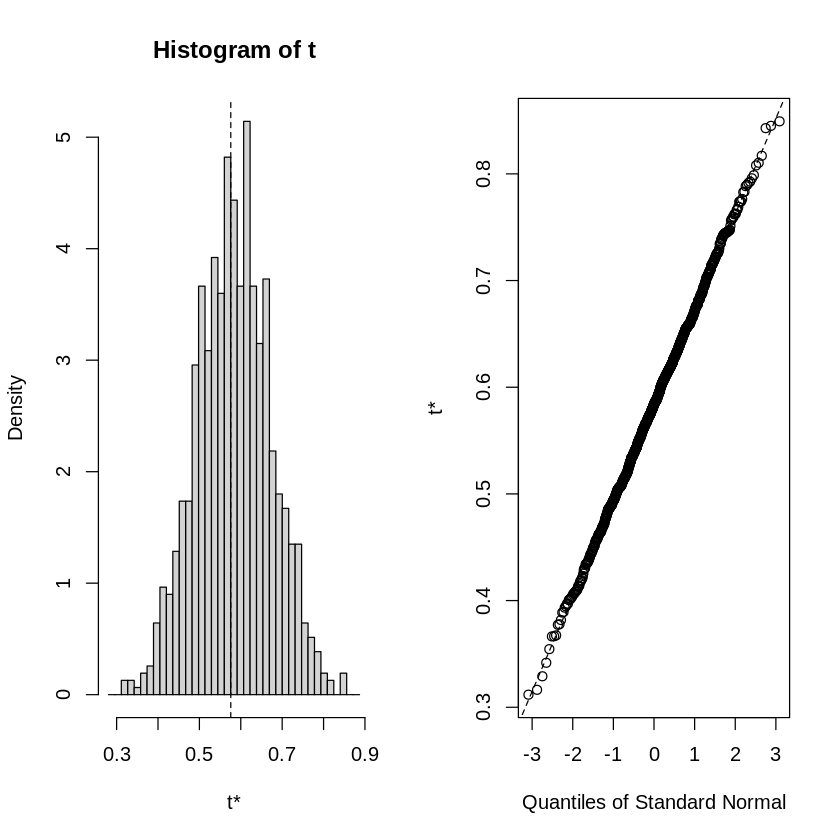

In [21]:
#Bootstrap on Regression:step 5-
#generate the bootstrap estimates we can also view the confidence intervals with boot.ci and plot our results
set.seed(123)
result2 <- boot(portfolio2, statistic2, R = 1000)
boot.ci(result2, type = "basic")
plot(result2)

**conclusion and analysis:**

**1. non-numerical variables:**
some variables are not numerical, such as cut,colour,clarity, so all need to be converted to numerical first.

**2. data split: **
  split the dataset into train and test :80%- 20%

**3. two cross validation ways have beed used **
*   Leave-One-Out Cross-Validation
*   k-Fold Cross Validation
Our results illustrate a sharp drop in the estimated test MSE between the linear and quadratic fits, but then no clear improvement from using higher-order polynomials. Thus, our unbiased MSEs suggest that using a 2nd polynomial (quadratic fit) is likely the optimal model balancing interpretation and low test errors.

**4.  Bootstrap on Regression: **

This indicates that the bootstrap estimate is 0.089
